In [ ]:
!pip install pySURF
!pip install wget

In [2]:
# import libs
import os
import wget
import zipfile
import shutil  
import csv
import numpy as np

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
#---------------------------------------------------------------------------------------
# 0. Download data
#---------------------------------------------------------------------------------------

url = 'https://berkeley.box.com/shared/static/jbvyu0ng0zrt75il3ps1qygwellpr8c5.zip'
workDir = 'tmp'
fileName = 'AnchorageBuildings.zip'
print('Beginning file download with wget module')
wget.download(url, fileName)
print('\nFile downloaded. \n')

with zipfile.ZipFile(fileName, 'r') as zip_ref:
    zip_ref.extractall('tmp')

try:
    dest = shutil.move(fileName, workDir+'/') 
except:
    os.remove(workDir+'/'+fileName)
    dest = shutil.move(fileName, workDir+'/') 



Beginning file download with wget module

File downloaded. 



In [4]:
#---------------------------------------------------------------------------------------
# 1. Prepare data
#---------------------------------------------------------------------------------------

BIMFileName = 'tmp/AnchorageBuildings.csv'

# read raw data
data = []
with open(BIMFileName, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        lat = float(row['Latitude'])
        lon = float(row['Longitude'])
        yearbuilt = int(float(row['Year Built']) )
        if lat>61.05 and lat<61.2 and lon>-150. and lon<-149.7:
            data.append([lon, lat, yearbuilt])

# data is a numpy matrix with columns: [x,y,value]
data = np.array(data)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 26,625
Trainable params: 26,625
Non-trainable params: 0
_________________________________________________________________
[1974. 1966. 1983. ... 1975. 1988. 1966.]
0
....................................................

      val_loss  val_mean_absolute_error 

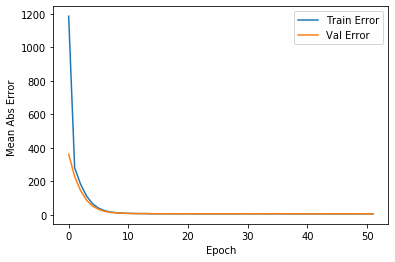

Testing set Mean Abs Error:  4.53 


In [5]:
#---------------------------------------------------------------------------------------
# 2. Train a neural network
#---------------------------------------------------------------------------------------
from surf.NN import SpatialNeuralNet


# define a spatial neural network
# numNei is the number of nearest neighbors to be considered
# writeTmpData is true so that temporary files are written down in ./tmp
nn = SpatialNeuralNet(rawData = data, numNei = 2, writeTmpData=True)
nn.build_model()
nn.train()



[1983. 2003. 1983. ... 1973. 1964. 1983.]
[1982.8376 1969.1339 1983.1897 ... 1981.2931 1962.5244 1985.4075]
errors:  
[ -0.16235352 -33.86608887   0.18969727 ...   8.29309082  -1.47558594
   2.4074707 ]


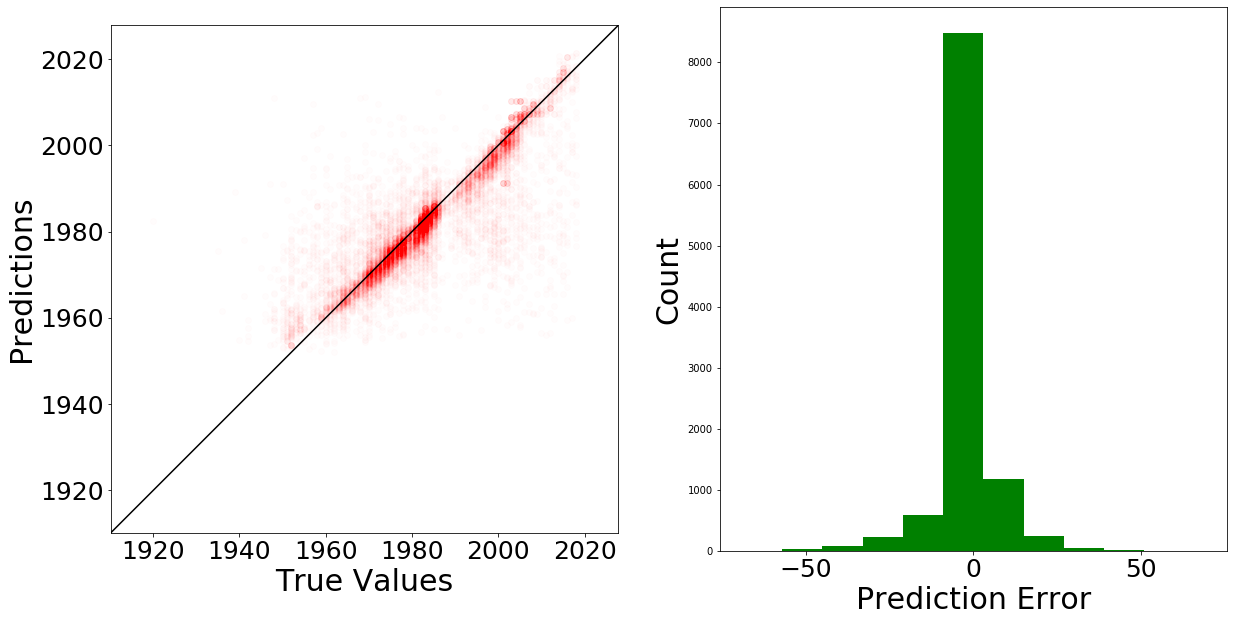

In [6]:
#---------------------------------------------------------------------------------------
# 3. Test the neural network
#---------------------------------------------------------------------------------------

nn.test()